In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('House_Pricing.csv')

In [ ]:
# handling missing data

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
horsepower_median = df['horsepower'].median(skipna=True)
print("\nMedian of horsepower column:", horsepower_median)

df['horsepower'].fillna(horsepower_median, inplace=True)

print("\nDataset after replacing missing values:")
print(df.isnull().sum())

In [2]:
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [4]:
df.describe()


,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df[~df['No of Times Visited'].isna()]

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
15,9297300055,15 January 2016,650000.0,4,3.00,2950.0,5000.0,2.0,No,Thrice,...,9,1980.0,970,39,0,98126.0,47.5714,-122.375,2140.0,4000
21,2524049179,14 August 2017,2000000.0,3,2.75,3050.0,44867.0,1.0,No,Four,...,9,2330.0,720,50,0,98040.0,47.5316,-122.233,4110.0,20336
49,822039084,15 March 2016,1350000.0,3,2.50,2753.0,65005.0,1.0,Yes,Twice,...,9,2165.0,588,65,0,98070.0,47.4041,-122.451,2680.0,72513
58,7922800400,14 August 2017,951000.0,5,3.25,3250.0,14342.0,2.0,No,Four,...,8,3250.0,0,50,0,98008.0,47.5880,-122.116,2960.0,11044
60,1516000055,14 December 2017,650000.0,3,2.25,2150.0,21235.0,1.0,No,Thrice,...,8,1590.0,560,59,0,98166.0,47.4336,-122.339,2570.0,18900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21554,2855000110,14 August 2017,388000.0,3,2.50,2198.0,6222.0,2.0,No,Twice,...,8,2198.0,0,8,0,98198.0,47.3906,-122.304,2198.0,7621
21576,9253900271,15 January 2016,3570000.0,5,4.50,4850.0,10584.0,2.0,Yes,Four,...,10,3540.0,1310,11,0,98008.0,47.5943,-122.110,3470.0,18270
21579,7011201004,14 May 2017,645000.0,3,3.25,1730.0,1229.0,2.0,No,Twice,...,9,1320.0,410,10,0,98119.0,47.6374,-122.369,1710.0,1686
21593,8672200110,15 March 2016,1090000.0,5,3.75,4170.0,8142.0,2.0,No,Twice,...,10,4170.0,0,12,0,98056.0,47.5354,-122.181,3030.0,7980


In [6]:
# Since the count of null values in no: of visits is more than 5 times the data available, we can Either drop the varibale/column as a whole and work with remaining data
# or we can upscale the data. I have decided to drop the variable as upsacling will only get you so far and overdoing it may cause more harm than help

df= df.drop('No of Times Visited',axis=1)
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
Condition of the House,0


 Segragating numerical and categorical data

In [7]:
num_df= df.select_dtypes(include=['int64','float64'])
cat_df= df.select_dtypes(include=['object'])

In [8]:

num_df.drop('Renovated Year',axis=1,inplace=True)

ZIPCODE

In [9]:
df[df['Zipcode'].isna()]

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
586,7942601895,14 August 2017,640000.0,3,2.5,2160.0,4000.0,1.5,No,Fair,8,1960.0,200,115,2013,NaN,47.6045,-122.307,2160.0,5120


In [10]:
#interp_numdf=num_df.interpolate()
# zip_df=df.groupby('Zipcode')
# zip_df.count()

# id_df=df.groupby('ID')
# id_df.count()
filtered_df = df[df['ID'].astype(str).str.startswith('7942601')]
print(filtered_df[['ID','Zipcode']])

               ID  Zipcode
586    7942601895      NaN
1870   7942601805  98122.0
2698   7942601200  98122.0
5502   7942601410  98122.0
5567   7942601155  98122.0
8215   7942601810  98122.0
16889  7942601435  98122.0
19188  7942601475  98122.0


Since zipcode is a number the denotes the place at which a house is located , i cannot use mean,median or mode to fill the nan values. The only way is to use another data that can linear be dependant on the location of a house. The variable that i chose was the unique ID. The definition of rule of ID is creating them with meaning rather than givifn random unique values. Therefore i tried to find some relation between the unique values.

As you can see above, there exist unique ids that share a major part of their number sequence with each other. That is if you remove the last 2 or 3 digits, chances are there exits groups in ID. Which is why the O/P of the above cell shows 8 Rows of data with the same 1st 6 digits in their ID and Luckily they all share the same Zipcode too. Now that i have found a direct relation between ID and Zipcode, and also since the row with the missing zipcode is also present among these values, i can safely assume that the house with the missing zipcode also exist in the same area and hence i assigned the common zipcode to fill the nan cell

In [11]:
df.at[586,'Zipcode']=98122.0
df.iloc[586]['Zipcode']

98122.0

Flat Area (in Sqft)	&
Lot Area (in Sqft)

In [12]:
# df[df['Flat Area (in Sqft)'].isna()]
num_df[num_df['Lot Area (in Sqft)'].isna()][['Lot Area (in Sqft)','Lot Area after Renovation (in Sqft)']]

,Lot Area (in Sqft),Lot Area after Renovation (in Sqft)
226,NaN,6009
402,NaN,4500
438,NaN,3090
6030,NaN,34800
7132,NaN,10083
9684,NaN,15542
11801,NaN,7680
13918,NaN,5243
15049,NaN,6700


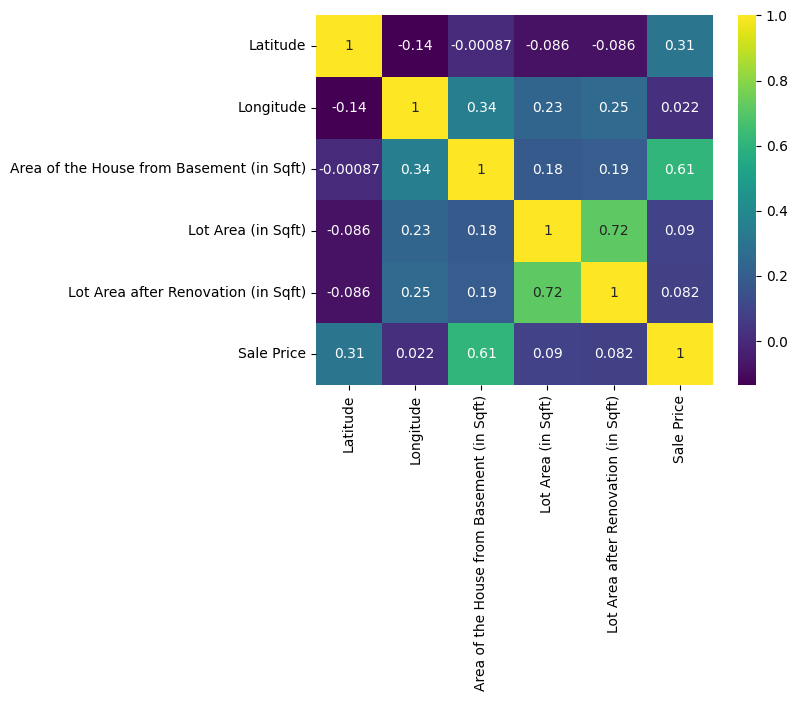

In [13]:
corr_df=df.loc[:,['Latitude','Longitude','Area of the House from Basement (in Sqft)','Lot Area (in Sqft)','Lot Area after Renovation (in Sqft)','Sale Price']]
corr_df.corr()

sns.heatmap(corr_df.corr(),annot=True,cmap='viridis')
plt.show()

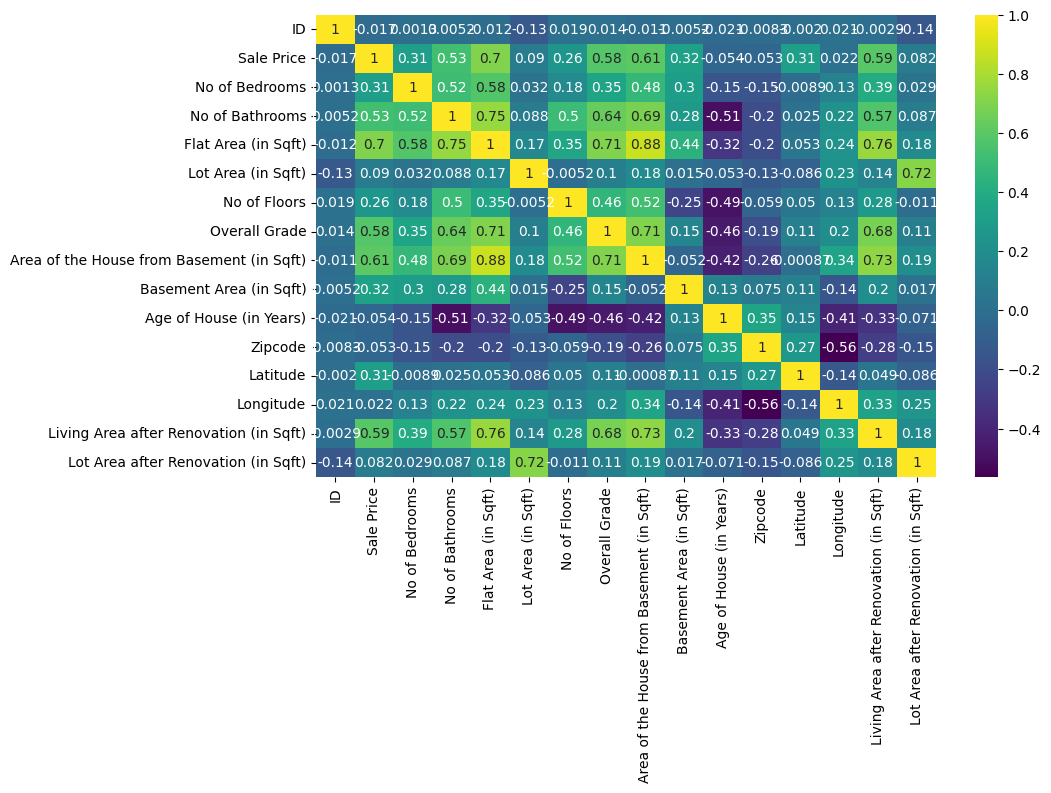

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(),annot=True,cmap='viridis')
plt.show()

After observing the heapmap projection of the correlation between numerical data and the target i.e sales price, it is evident that the only the following varibales have a positive correlation with sales price:

1) Living Area after renovation

2) Number of bathrooms

3) Flat Area (in Sqft)

4) Overall grade

5)Area of the House from basement (in Sqft)

therefore, data cleaning is best focused on only these variables

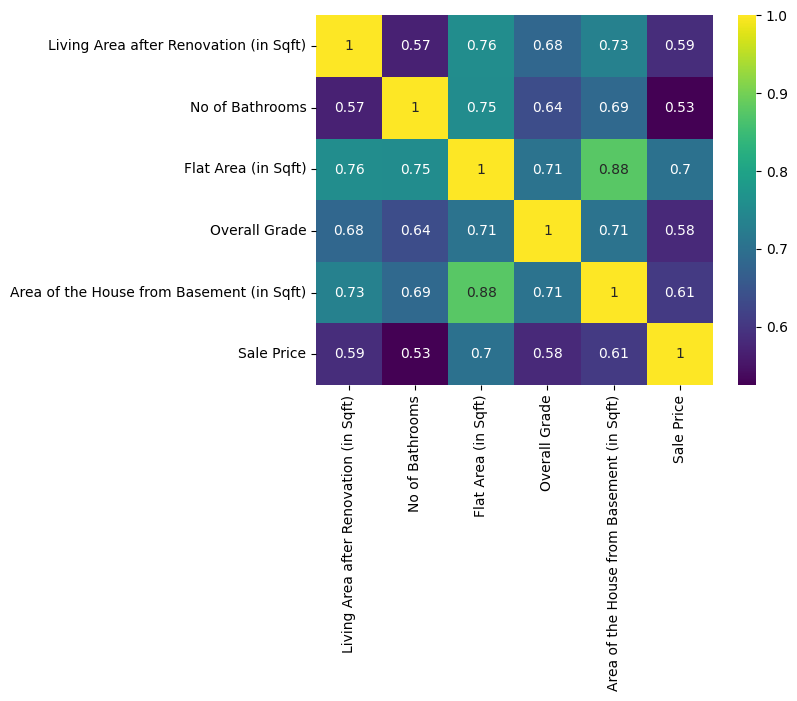

In [15]:
corr_df=num_df.loc[:,['Living Area after Renovation (in Sqft)','No of Bathrooms','Flat Area (in Sqft)','Overall Grade','Area of the House from Basement (in Sqft)','Sale Price']]
corr_df.corr()

sns.heatmap(corr_df.corr(),annot=True,cmap='viridis')
plt.show()

Heatmapping the correlation between the ideal varibales shows all values above 0.5 meaning all of them relate positively with each other. All the more reason to use only these out of all numerical data.


In [16]:
cat_df

,Date House was Sold,Waterfront View,Condition of the House
0,14 October 2017,No,Fair
1,14 December 2017,No,Fair
2,15 February 2016,No,Fair
3,14 December 2017,No,Excellent
4,15 February 2016,No,Fair
...,...,...,...
21608,14 May 2017,No,Fair
21609,15 February 2016,No,Fair
21610,14 June 2017,No,Fair
21611,15 January 2016,No,Fair


HANDLING MISSING NUMERICAL VALUES

In [17]:
miss_cols=list(corr_df.isna().sum().index)
corr_df[corr_df[miss_cols[1]].isna()]

,Living Area after Renovation (in Sqft),No of Bathrooms,Flat Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),Sale Price
321,2660.0,NaN,2030.0,8,2030.0,520000.0
352,1940.0,NaN,1900.0,7,1300.0,315000.0
21376,1500.0,NaN,1310.0,7,1060.0,365000.0
21426,3210.0,NaN,3660.0,9,2840.0,1110000.0


since the correlation is below .5 for bathrooms data with in the range of its missing values, we can fill missing values using interpolate fucntion

In [18]:
# filling missing values with adjacent values using interpolate function
corr_df=corr_df.interpolate()

In [19]:
miss_cols=list(corr_df.isna().sum().index)
corr_df[corr_df[miss_cols[1]].isna()]

,Living Area after Renovation (in Sqft),No of Bathrooms,Flat Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),Sale Price


In [21]:
miss_cols2=list(cat_df.isna().sum().index)
cat_df[cat_df[miss_cols2[1]].isna()]
#no missing values in categorical data

,Date House was Sold,Waterfront View,Condition of the House


In [22]:
final_df=pd.concat([corr_df,cat_df],axis=1)
final_df

,Living Area after Renovation (in Sqft),No of Bathrooms,Flat Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),Sale Price,Date House was Sold,Waterfront View,Condition of the House
0,1340.0,1.00,1180.0,7,1180.0,221900.0,14 October 2017,No,Fair
1,1690.0,2.25,2570.0,7,2170.0,538000.0,14 December 2017,No,Fair
2,2720.0,1.00,770.0,6,770.0,180000.0,15 February 2016,No,Fair
3,1360.0,3.00,1960.0,7,1050.0,604000.0,14 December 2017,No,Excellent
4,1800.0,2.00,1680.0,8,1680.0,510000.0,15 February 2016,No,Fair
...,...,...,...,...,...,...,...,...,...
21608,1530.0,2.50,1530.0,8,1530.0,360000.0,14 May 2017,No,Fair
21609,1830.0,2.50,2310.0,8,2310.0,400000.0,15 February 2016,No,Fair
21610,1020.0,0.75,1020.0,7,1020.0,402101.0,14 June 2017,No,Fair
21611,1410.0,2.50,1600.0,8,1600.0,400000.0,15 January 2016,No,Fair


In [26]:
num_df= final_df.select_dtypes(include=['int64','float64'])
cat_df= final_df.select_dtypes(include=['object'])

In [28]:
target=num_df['Sale Price']
num_df.drop('Sale Price',axis=1,inplace=True)

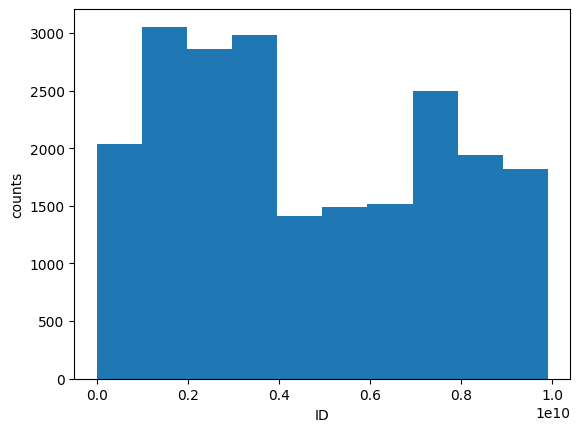

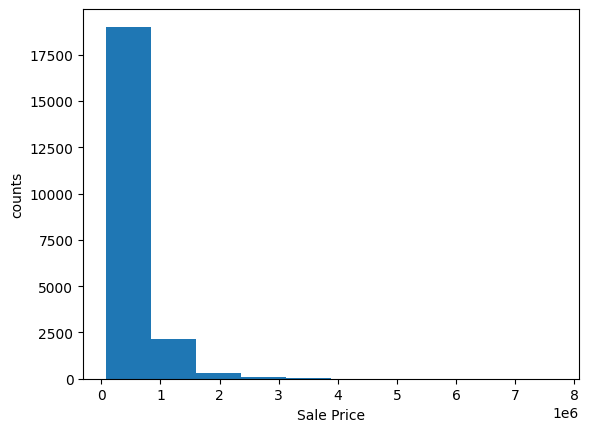

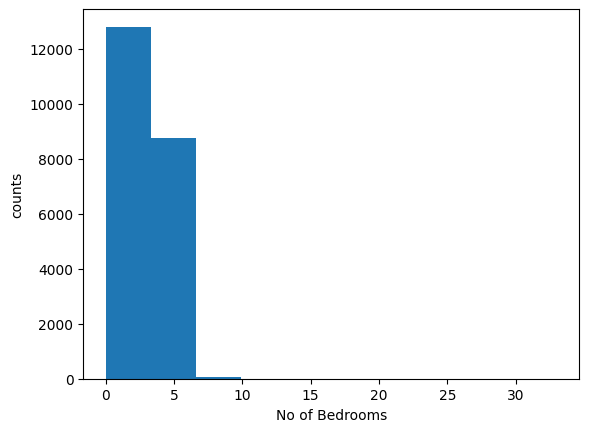

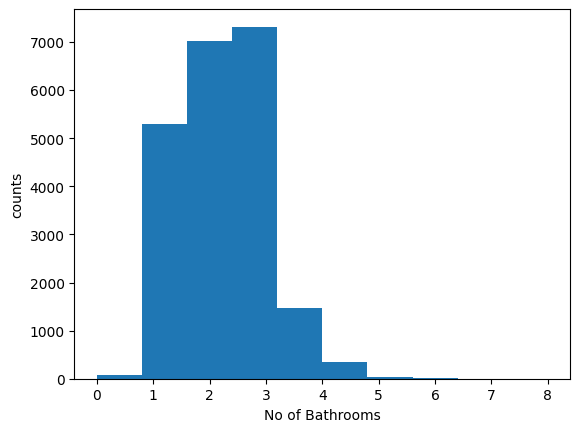

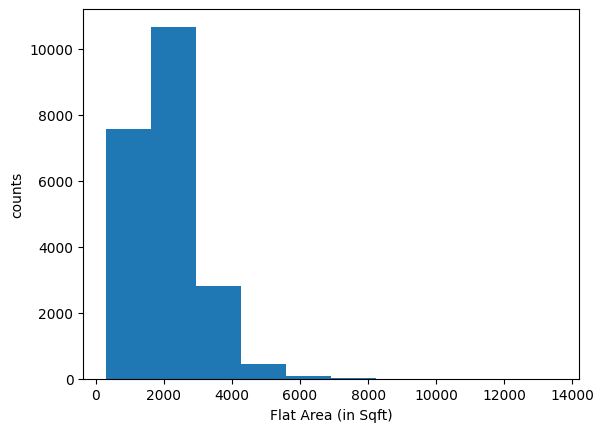

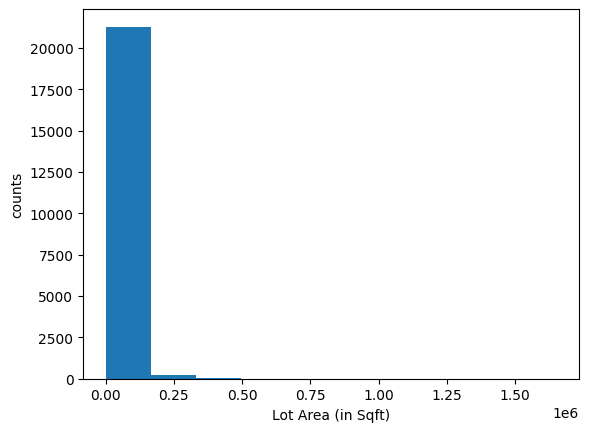

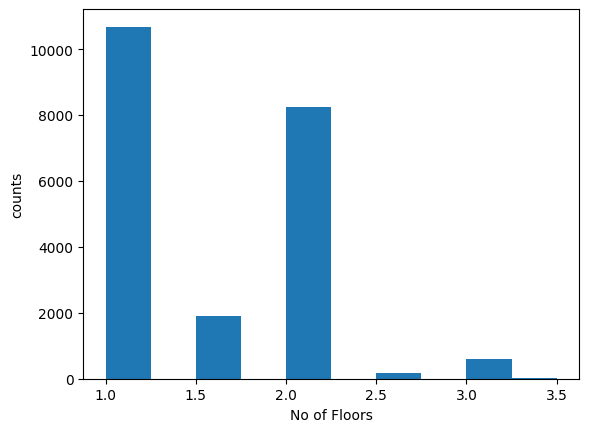

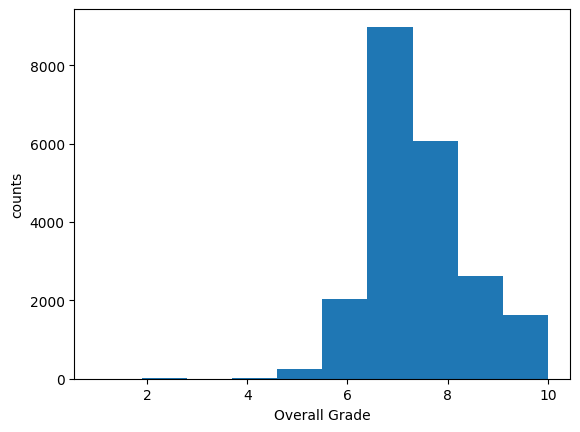

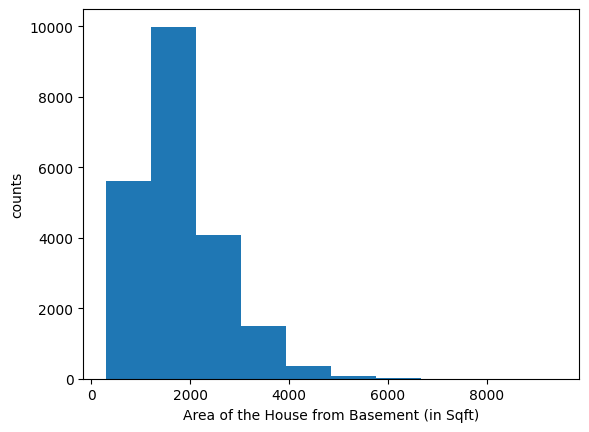

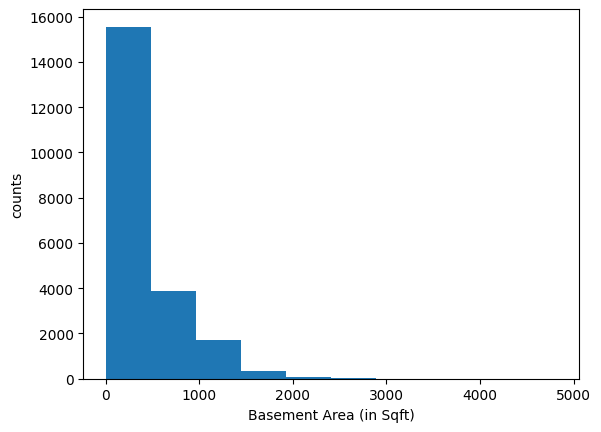

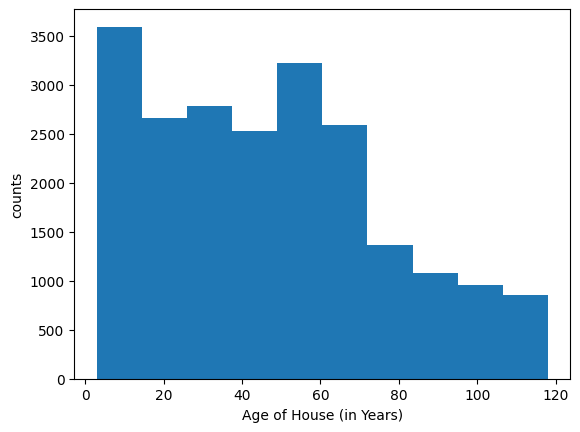

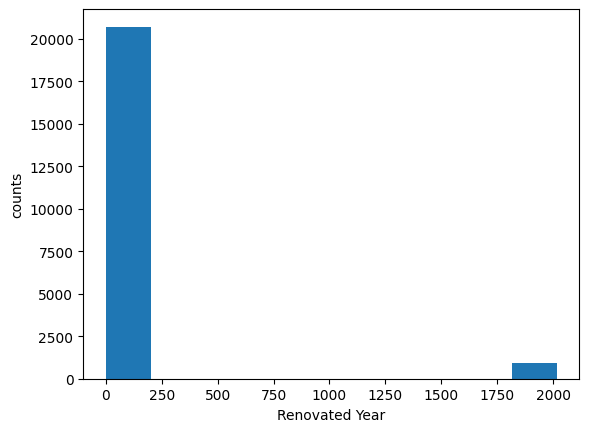

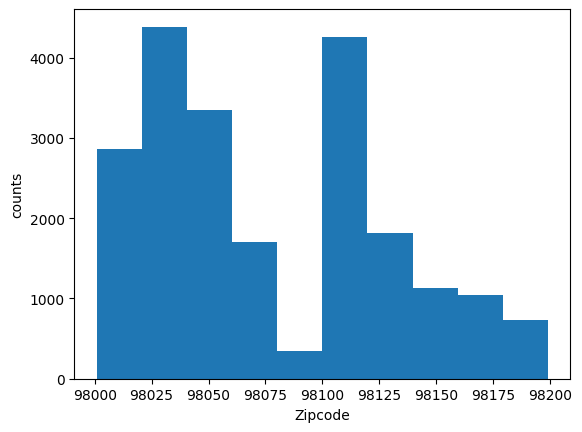

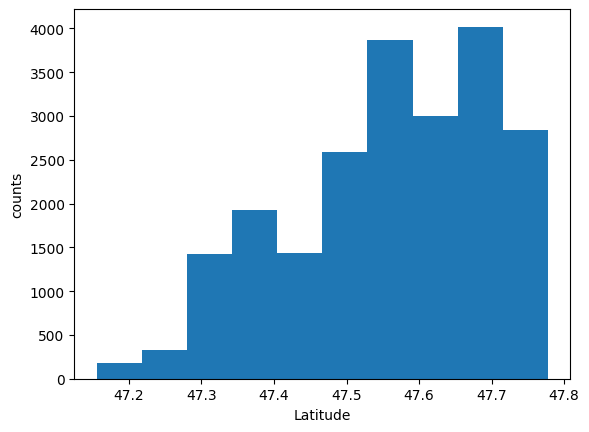

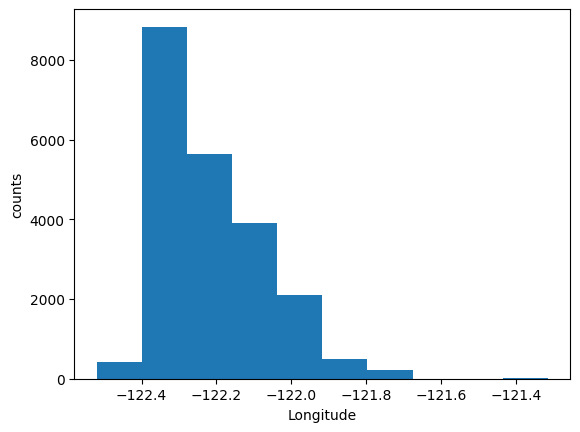

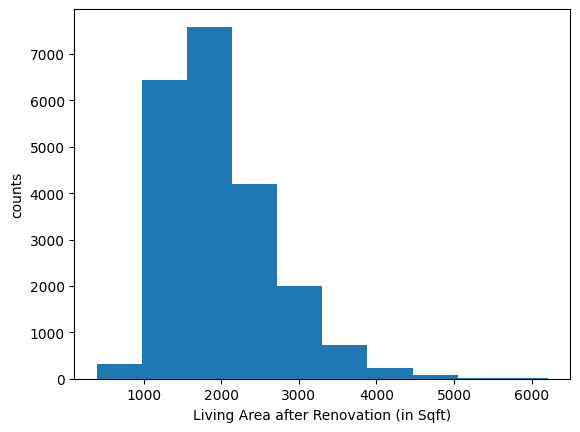

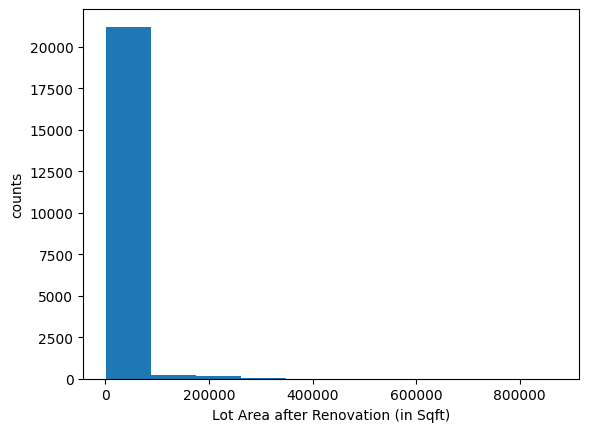

In [24]:
for col in num_df.columns :
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

In [34]:
# since most are skewed, we will do minmax scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_num_df=num_df.copy()
scaled_num_df[['Living Area after Renovation (in Sqft)', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Overall Grade',
       'Area of the House from Basement (in Sqft)']]= scaler.fit_transform(num_df[['Living Area after Renovation (in Sqft)', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Overall Grade',
       'Area of the House from Basement (in Sqft)']])
scaled_num_df

,Living Area after Renovation (in Sqft),No of Bathrooms,Flat Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft)
0,0.161934,0.12500,0.067170,0.666667,0.097588
1,0.222165,0.28125,0.172075,0.666667,0.206140
2,0.399415,0.12500,0.036226,0.555556,0.052632
3,0.165376,0.37500,0.126038,0.666667,0.083333
4,0.241094,0.25000,0.104906,0.777778,0.152412
...,...,...,...,...,...
21608,0.194631,0.31250,0.093585,0.777778,0.135965
21609,0.246257,0.31250,0.152453,0.777778,0.221491
21610,0.106866,0.09375,0.055094,0.666667,0.080044
21611,0.173980,0.31250,0.098868,0.777778,0.143640


In [35]:
cat_df
#

,Date House was Sold,Waterfront View,Condition of the House
0,14 October 2017,No,Fair
1,14 December 2017,No,Fair
2,15 February 2016,No,Fair
3,14 December 2017,No,Excellent
4,15 February 2016,No,Fair
...,...,...,...
21608,14 May 2017,No,Fair
21609,15 February 2016,No,Fair
21610,14 June 2017,No,Fair
21611,15 January 2016,No,Fair


In [39]:
#since date is in dd month yyyy format, lets split that
date=pd.DataFrame(columns=["date_of_sale"])
# Convert to datetime format
date['date_of_sale'] = pd.to_datetime(cat_df['Date House was Sold'], format='%d %B %Y')

# Check the conversion
print(date)

      date_of_sale
0       2017-10-14
1       2017-12-14
2       2016-02-15
3       2017-12-14
4       2016-02-15
...            ...
21608   2017-05-14
21609   2016-02-15
21610   2017-06-14
21611   2016-01-15
21612   2017-10-14

[21613 rows x 1 columns]


In [40]:
date['day'] = date['date_of_sale'].dt.day
date['month'] = date['date_of_sale'].dt.month
date['year'] = date['date_of_sale'].dt.year


In [43]:
date

,day,month,year
0,14,10,2017
1,14,12,2017
2,15,2,2016
3,14,12,2017
4,15,2,2016
...,...,...,...
21608,14,5,2017
21609,15,2,2016
21610,14,6,2017
21611,15,1,2016


In [49]:
#scaled_num_df=pd.concat([scaled_num_df,date],axis=1)
pd.concat([scaled_num_df,target],axis=1).corr()

,Living Area after Renovation (in Sqft),No of Bathrooms,Flat Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),day,month,year,Sale Price
Living Area after Renovation (in Sqft),1.000000,0.568556,0.755967,0.681331,0.731817,-0.021712,0.002465,0.021712,0.585334
No of Bathrooms,0.568556,1.000000,0.754495,0.635558,0.684854,-0.026465,0.007219,0.026465,0.525143
Flat Area (in Sqft),0.755967,0.754495,1.000000,0.705446,0.875658,-0.029153,0.011965,0.029153,0.701853
Overall Grade,0.681331,0.635558,0.705446,1.000000,0.704849,-0.030953,0.007640,0.030953,0.580576
Area of the House from Basement (in Sqft),0.731817,0.684854,0.875658,0.704849,1.000000,-0.023863,0.010154,0.023863,0.605207
day,-0.021712,-0.026465,-0.029153,-0.030953,-0.023863,1.000000,-0.782389,-1.000000,0.003623
month,0.002465,0.007219,0.011965,0.007640,0.010154,-0.782389,1.000000,0.782389,-0.010167
year,0.021712,0.026465,0.029153,0.030953,0.023863,-1.000000,0.782389,1.000000,-0.003623
Sale Price,0.585334,0.525143,0.701853,0.580576,0.605207,0.003623,-0.010167,-0.003623,1.000000


In [51]:
#since sales price has no correlation with date data, lets drop that.

cat_df.drop('Date House was Sold',axis=1,inplace=True)

In [52]:
cat_df

,Waterfront View,Condition of the House
0,No,Fair
1,No,Fair
2,No,Fair
3,No,Excellent
4,No,Fair
...,...,...
21608,No,Fair
21609,No,Fair
21610,No,Fair
21611,No,Fair


In [54]:
unique = cat_df['Condition of the House'].unique()
unique

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


In [61]:
categories =[['Bad','Okay','Fair','Good','Excellent']]
ordinal_enc= OrdinalEncoder(categories=categories)
cat_df[['condition_enc']]= ordinal_enc.fit_transform(cat_df[['Condition of the House']])

cat_df

,Waterfront View,Condition of the House,condition_enc
0,No,Fair,2.0
1,No,Fair,2.0
2,No,Fair,2.0
3,No,Excellent,4.0
4,No,Fair,2.0
...,...,...,...
21608,No,Fair,2.0
21609,No,Fair,2.0
21610,No,Fair,2.0
21611,No,Fair,2.0


In [62]:
unique = cat_df['Waterfront View'].unique()
unique

array(['No', 'Yes'], dtype=object)

In [63]:
binary_mapping = {
    'Yes': 1,
    'No': 0
}

# Apply the binary encoding to the 'response' column
cat_df['view_enc'] = cat_df['Waterfront View'].map(binary_mapping)
cat_df

,Waterfront View,Condition of the House,condition_enc,view_enc
0,No,Fair,2.0,0
1,No,Fair,2.0,0
2,No,Fair,2.0,0
3,No,Excellent,4.0,0
4,No,Fair,2.0,0
...,...,...,...,...
21608,No,Fair,2.0,0
21609,No,Fair,2.0,0
21610,No,Fair,2.0,0
21611,No,Fair,2.0,0


In [64]:
cat_df.drop(['Condition of the House','Waterfront View'],axis=1,inplace=True)

In [76]:
scaled_num_df.drop(['day','month','year'],axis=1,inplace=True)

,Living Area after Renovation (in Sqft),No of Bathrooms,Flat Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),condition_enc,view_enc
0,0.161934,0.12500,0.067170,0.666667,0.097588,2.0,0
1,0.222165,0.28125,0.172075,0.666667,0.206140,2.0,0
2,0.399415,0.12500,0.036226,0.555556,0.052632,2.0,0
3,0.165376,0.37500,0.126038,0.666667,0.083333,4.0,0
4,0.241094,0.25000,0.104906,0.777778,0.152412,2.0,0
...,...,...,...,...,...,...,...
21608,0.194631,0.31250,0.093585,0.777778,0.135965,2.0,0
21609,0.246257,0.31250,0.152453,0.777778,0.221491,2.0,0
21610,0.106866,0.09375,0.055094,0.666667,0.080044,2.0,0
21611,0.173980,0.31250,0.098868,0.777778,0.143640,2.0,0


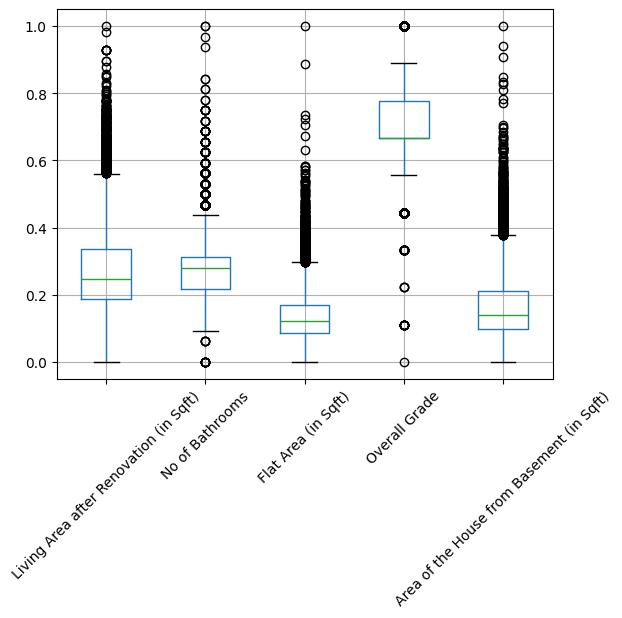

In [78]:
scaled_num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [79]:
def replace_outliers(df,col_name):
    q1= df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    up_bound= q3 + 1.5*iqr
    low_bound= q1 - 1.5* iqr

    outliers = df[(df[col_name] < low_bound) | (df[col_name] > up_bound)]
    df[col_name].clip(upper=up_bound,inplace=True)
    df[col_name].clip(lower=low_bound,inplace=True)
    #print(f"\n{col_name}\n",outliers[col_name])
    return df[col_name]

for col in scaled_num_df.columns:
    scaled_num_df[col]=replace_outliers(scaled_num_df,col)

<ipython-input-79-0e60c7998e5c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].clip(upper=up_bound,inplace=True)
<ipython-input-79-0e60c7998e5c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

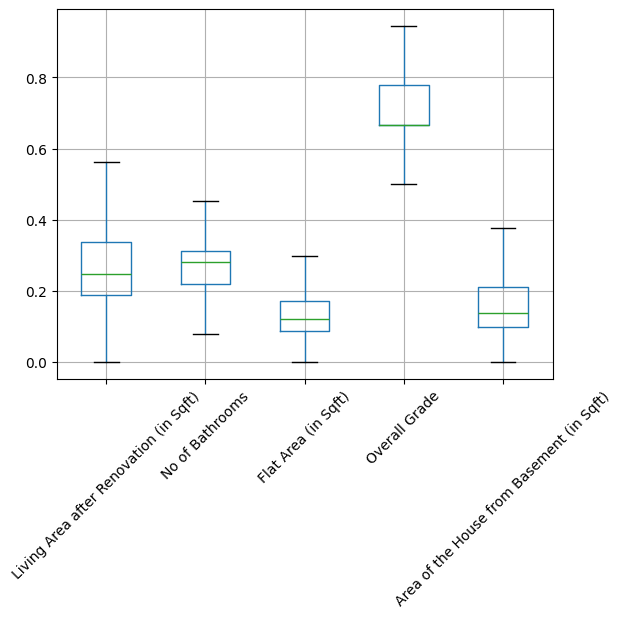

In [80]:
scaled_num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [81]:
the_df=pd.concat([scaled_num_df,cat_df],axis=1)
the_df

,Living Area after Renovation (in Sqft),No of Bathrooms,Flat Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),condition_enc,view_enc
0,0.161934,0.12500,0.067170,0.666667,0.097588,2.0,0
1,0.222165,0.28125,0.172075,0.666667,0.206140,2.0,0
2,0.399415,0.12500,0.036226,0.555556,0.052632,2.0,0
3,0.165376,0.37500,0.126038,0.666667,0.083333,4.0,0
4,0.241094,0.25000,0.104906,0.777778,0.152412,2.0,0
...,...,...,...,...,...,...,...
21608,0.194631,0.31250,0.093585,0.777778,0.135965,2.0,0
21609,0.246257,0.31250,0.152453,0.777778,0.221491,2.0,0
21610,0.106866,0.09375,0.055094,0.666667,0.080044,2.0,0
21611,0.173980,0.31250,0.098868,0.777778,0.143640,2.0,0


In [83]:
X=the_df
y=target.values.ravel()
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)